In [124]:
# Imported all necessary libraries here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
import datetime as dt
import pylab 
import scipy.stats as stats
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [125]:
# Load dataframe into df object.
df = pd.read_csv("dataset.csv")

In [126]:
df.head(20)

,Date,Price,Open,High,Low,Vol.,Change %
0,16-Feb-22,"3,069.74","3,182.32","3,184.15","3,045.92",401.88K,-3.54%
1,15-Feb-22,"3,182.27","2,929.29","3,193.18","2,912.61",540.04K,8.64%
2,14-Feb-22,"2,929.31","2,871.06",NaN,"2,834.13",477.24K,2.06%
3,13-Feb-22,"2,870.25","2,917.16","2,952.94","2,838.29",303.12K,-1.61%
4,12-Feb-22,NaN,"2,927.64","2,984.72","2,858.85",433.29K,-0.36%
5,11-Feb-22,"2,927.63","3,071.80","3,136.33","2,880.60",607.93K,-4.69%
6,10-Feb-22,"3,071.83","3,243.73","3,277.36","3,058.59",742.54K,-5.30%
7,09-Feb-22,"3,243.62","3,115.91","3,266.41","3,055.95",477.82K,4.10%
8,08-Feb-22,"3,115.88","3,139.65","3,228.86","3,029.70",NaN,-0.77%
9,07-Feb-22,"3,140.18","3,056.29","3,185.77","2,995.59",568.42K,2.75%


In [127]:
df.shape

(1128, 7)

In [128]:
df.dtypes

Date        object
Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      1115 non-null   object
 1   Price     1112 non-null   object
 2   Open      1114 non-null   object
 3   High      1119 non-null   object
 4   Low       1124 non-null   object
 5   Vol.      1121 non-null   object
 6   Change %  1120 non-null   object
dtypes: object(7)
memory usage: 61.8+ KB



# Data Preparation


In [130]:
# Find out how many percetange of values are NULL or NAN.
((df.isnull() | df.isna()).sum() * 100 / df.index.size).round(2)

Date        1.15
Price       1.42
Open        1.24
High        0.80
Low         0.35
Vol.        0.62
Change %    0.71
dtype: float64

### * Fill-Out Missing Data

#### 1) Date

In [131]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [132]:
print(f'''Total number of null valus in Date column is:- {df["Date"].isnull().sum()}''')

Total number of null valus in Date column is:- 13


In [133]:
# Function to print all rows which have null values column wise.
def missing_rows(dataframe_name,column_name):
    return dataframe_name[dataframe_name[column_name].isnull()]
missing_rows(dataframe_name=df,column_name="Date")

,Date,Price,Open,High,Low,Vol.,Change %
12,NaN,"2,994.99","2,692.80","2,994.99","2,671.72",908.75K,11.22%
42,NaN,"3,535.86","3,784.47","3,846.44","3,418.46",582.71K,-6.69%
88,NaN,"4,408.85","4,295.27","4,434.27","4,206.75",462.99K,2.64%
139,NaN,"3,000.59","2,851.06","3,047.08","2,837.68",968.23K,5.23%
201,NaN,"2,460.95","2,380.59","2,467.40","2,320.80",1.03M,3.36%
280,NaN,"3,811.77","4,173.61","4,366.10","3,794.15",2.78M,-8.54%
391,NaN,"1,117.33","1,377.63","1,387.39","1,095.26",NaN,-18.89%
494,NaN,370.16,365.25,377.97,364.57,7.17M,1.34%
619,NaN,244.56,242,244.94,235.44,8.10M,1.06%
722,NaN,246.96,265.63,266.17,245.75,NaN,-7.04%


In [134]:
df["Date"] = pd.to_datetime(df.Date)

In [135]:
df["Date"].dtype

dtype('<M8[ns]')

In [136]:
df["Date"].head(14)

0    2022-02-16
1    2022-02-15
2    2022-02-14
3    2022-02-13
4    2022-02-12
5    2022-02-11
6    2022-02-10
7    2022-02-09
8    2022-02-08
9    2022-02-07
10   2022-02-06
11   2022-02-05
12          NaT
13   2022-02-03
Name: Date, dtype: datetime64[ns]

Lets just deconstruct date and make new columns in order to 
store day, month and year.

In [137]:
def make_new_columns_day_month_year(dataframe_name,date_column_name):
    dataframe_name["Day"] = dataframe_name[date_column_name].dt.day
    dataframe_name["Month"] = dataframe_name[date_column_name].dt.month
    dataframe_name["Year"] = dataframe_name[date_column_name].dt.year

In [138]:
make_new_columns_day_month_year(df,"Date")

In [139]:
# we have made new columns day, month and year and its in float format.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1115 non-null   datetime64[ns]
 1   Price     1112 non-null   object        
 2   Open      1114 non-null   object        
 3   High      1119 non-null   object        
 4   Low       1124 non-null   object        
 5   Vol.      1121 non-null   object        
 6   Change %  1120 non-null   object        
 7   Day       1115 non-null   float64       
 8   Month     1115 non-null   float64       
 9   Year      1115 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 88.2+ KB


In [140]:
# Let's drop Date column now, we don't need anymore.

def drop_columns_from_dataframe(dataframe_name,list_of_columns_name):
    dataframe_name.drop(list_of_columns_name,axis=1,inplace=True)

In [141]:
drop_columns_from_dataframe(df,["Date"])

In [142]:
df.head()

,Price,Open,High,Low,Vol.,Change %,Day,Month,Year
0,"3,069.74","3,182.32","3,184.15","3,045.92",401.88K,-3.54%,16.0,2.0,2022.0
1,"3,182.27","2,929.29","3,193.18","2,912.61",540.04K,8.64%,15.0,2.0,2022.0
2,"2,929.31","2,871.06",NaN,"2,834.13",477.24K,2.06%,14.0,2.0,2022.0
3,"2,870.25","2,917.16","2,952.94","2,838.29",303.12K,-1.61%,13.0,2.0,2022.0
4,NaN,"2,927.64","2,984.72","2,858.85",433.29K,-0.36%,12.0,2.0,2022.0


In [143]:
df_day_month_year = df[["Day","Month","Year"]].copy()
df.drop(["Day","Month","Year"],axis=1,inplace=True)

In [144]:
df_day_month_year.head()

,Day,Month,Year
0,16.0,2.0,2022.0
1,15.0,2.0,2022.0
2,14.0,2.0,2022.0
3,13.0,2.0,2022.0
4,12.0,2.0,2022.0


##### Fill missing values in Day column

In [145]:
# First of all we are going to fill missing values in Day column.
def fill_Day_column_missing_values(dataframe_name,row):
    if(np.isnan(row["Month"])):
        # Here axis=1, and inplace=True is important bcz only we can only change value of object,
        # its not possible to mutate whole obbject. 
        dataframe_name.drop(row.name, inplace=True)
    else:
        if((dataframe_name.loc[row.name-1,"Day"] -1) != 0):
            calculated_day = (dataframe_name.loc[row.name-1,"Day"] -1)
        else:
            if(row["Month"] == 4 or row["Month"] == 6 or row["Month"] == 0 or row["Month"] == 11):
                calculated_day = (dataframe_name.loc[row.name-1,"Day"] -1) + 30
            elif(row["Month"] == 2):
                calculated_day = (dataframe_name.loc[row.name-1,"Day"] -1) + 28
            else:
                calculated_day = (dataframe_name.loc[row.name-1,"Day"] -1) + 31
    
        row["Day"] = calculated_day
    return row       


def fill_missing_values_for_day(dataframe_name):
    dataframe_name = dataframe_name.apply(
        lambda row: fill_Day_column_missing_values(dataframe_name,row) if np.isnan(row["Day"]) else row,
        axis=1
    )


In [146]:
fill_missing_values_for_day(df_day_month_year)

##### Fill missing values in Month column

In [147]:

# Now, we are going to fill missing values in Month column.
def fill_Month_column_missing_values(dataframe_name, row):
    if((row["Day"] != 30 or row["Day"] != 31)):
        calculated_month = dataframe_name.loc[row.name-1, "Month"]
    elif(row["Day"] == 28 and dataframe_name.loc[row.name-1, "Month"] == 3):
        calculated_month = 2
    else:
        calculated_month = dataframe_name.loc[row.name-1, "Month"]-1
    row["Month"] = calculated_month
    return row

def fill_missing_values_for_month(dataframe_name):
    dataframe_name = dataframe_name.apply(
        lambda row: fill_Month_column_missing_values(
            dataframe_name, row) if np.isnan(row["Month"]) else row,
        axis=1
    )


In [148]:
fill_missing_values_for_month(df_day_month_year)

##### Fill missing values in Year column

In [149]:
# Now, we are going to fill missing values in Month column.
def fill_Year_column_missing_values(dataframe_name, row):
    if(row["Day"] == 31 and row["Month"] == 12):
        calculated_Year = dataframe_name.loc[row.name-1, "Year"] -1
    else:
        calculated_Year = dataframe_name.loc[row.name-1, "Year"]
    row["Year"] = calculated_Year
    return row

def fill_missing_values_for_year(dataframe_name):
    dataframe_name = dataframe_name.apply(
        lambda row: fill_Year_column_missing_values(
            dataframe_name, row) if np.isnan(row["Year"]) else row,
        axis=1
    )


In [150]:
fill_missing_values_for_year(df_day_month_year)


In [151]:
# Let's merge our new dataframe with older one.
df = pd.merge(df, df_day_month_year, left_index=True, right_index=True)

In [152]:
df_day_month_year.head()

,Day,Month,Year
0,16.0,2.0,2022.0
1,15.0,2.0,2022.0
2,14.0,2.0,2022.0
3,13.0,2.0,2022.0
4,12.0,2.0,2022.0


In [153]:
missing_rows(
    column_name='Day',
    dataframe_name=df
)

,Price,Open,High,Low,Vol.,Change %,Day,Month,Year


<AxesSubplot:xlabel='Day', ylabel='Count'>

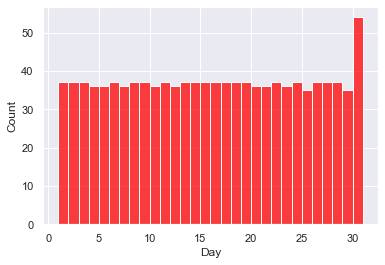

In [154]:
# Let's Analyze how far the data is spread.
list_of_days = []
for i in range(0, 31):
    list_of_days.append(i+1)
sns.histplot(df['Day'], color ='red',bins=list_of_days)

In [155]:
# filter on rows with specific values for day column.
def day_filter_with_specific_value(dataframe_name,column_name,value):
    return dataframe_name[dataframe_name[column_name] == value]

temp_df = day_filter_with_specific_value(
    dataframe_name=df,
    column_name="Day",
    value=31
)
len(temp_df)

22

<AxesSubplot:xlabel='Month', ylabel='Count'>

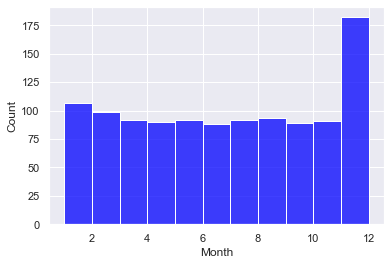

In [156]:
# Let's Analyze how far the data is spread.
list_of_months = []
for i in range(0, 12):
    list_of_months.append(i+1)
sns.histplot(df['Month'], color ='blue',bins=list_of_months)

In [157]:
# filter on rows with specific values for month column.
def month_filter_with_specific_value(dataframe_name,column_name,value):
    return dataframe_name[dataframe_name[column_name] == value]

temp_df = month_filter_with_specific_value(
    dataframe_name=df,
    column_name="Month",
    value=12
)
len(temp_df)

93

In [158]:
# Function to print all rows which have null values column wise.
len(missing_rows(dataframe_name=df,column_name="Month"))

0

<AxesSubplot:xlabel='Year', ylabel='Count'>

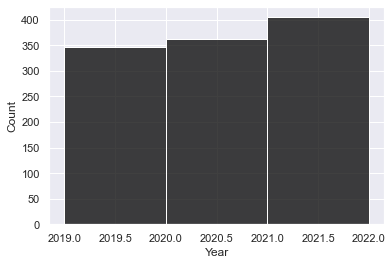

In [159]:
# Let's Analyze how far the data is spread.
list_of_years = [2019,2020,2021,2022]
sns.histplot(df['Year'], color ='black',bins=list_of_years)

In [160]:
# filter on rows with specific values for year column.
def year_filter_with_specific_value(dataframe_name,column_name,value):
    return dataframe_name[dataframe_name[column_name] == value]

temp_df = year_filter_with_specific_value(
    dataframe_name=df,
    column_name="Year",
    value=2022
)
len(temp_df)

45

#### 2) Price

In [161]:
df.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'Day', 'Month',
       'Year'],
      dtype='object')

In [162]:
missing_rows(dataframe_name=df,column_name="Price")

,Price,Open,High,Low,Vol.,Change %,Day,Month,Year
4,NaN,"2,927.64","2,984.72","2,858.85",433.29K,-0.36%,12.0,2.0,2022.0
32,NaN,"3,307.84","3,369.95","3,265.41",292.10K,0.60%,15.0,1.0,2022.0
271,NaN,"2,766.88","2,931.66",NaN,4.23M,-12.40%,21.0,5.0,2021.0
350,NaN,"1,488.80","1,653.04","1,477.72",1.17M,5.54%,3.0,3.0,2021.0
402,NaN,"1,275.87","1,347.98","1,180.45",2.65M,-1.53%,10.0,1.0,2021.0
536,NaN,395.32,405.53,391.97,5.23M,0.93%,29.0,8.0,2020.0
607,NaN,231.34,231.94,226.97,5.56M,-0.97%,19.0,6.0,2020.0
710,NaN,237.3,237.3,196.71,24.76M,-16.08%,8.0,3.0,2020.0
778,NaN,131.87,133.53,128.27,12.89M,-1.99%,31.0,12.0,2019.0
816,NaN,149.79,154.25,146.6,11.84M,1.77%,23.0,11.0,2019.0


In [163]:
df = df.replace(',','', regex=True)

In [164]:
df["Price"] = df["Price"].astype(float).fillna(0.0)

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution before filling missing values')

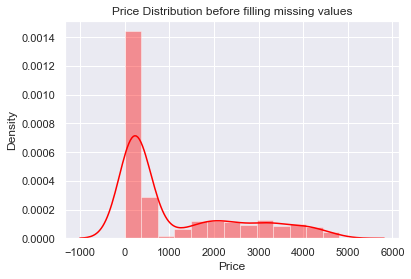

In [165]:
sns.distplot(df['Price'], color ='red').set_title("Price Distribution before filling missing values")

In [166]:
df_price = df[["Price"]].copy()

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution after filling missing values with mean')

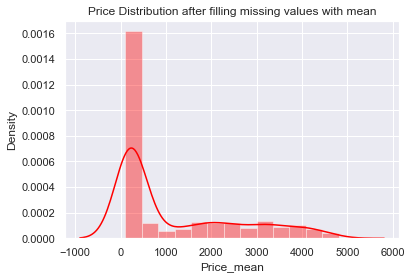

In [167]:
# Let's apply various methods for filling missing values.
# Mean
df_price["Price_mean"] = df_price["Price"].replace(0,df_price["Price"].mean())
sns.distplot(df_price['Price_mean'], color ='red').set_title("Price Distribution after filling missing values with mean")

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution after filling missing values with median')

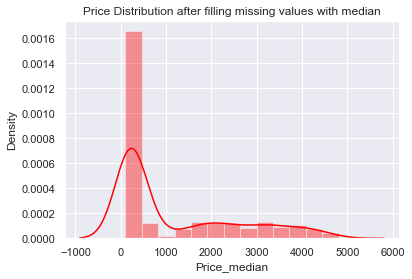

In [168]:
# Median
df_price["Price_median"] = df_price["Price"].replace(0,df_price["Price"].median())
sns.distplot(df_price['Price_median'], color ='red').set_title("Price Distribution after filling missing values with median")

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution after filling missing values with mode')

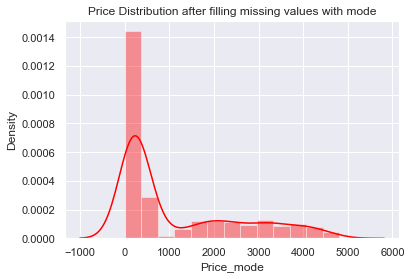

In [169]:
# Mode
df_price["Price_mode"] = df_price["Price"].replace(0,df_price["Price"].mode()[0])
sns.distplot(df_price['Price_mode'], color ='red').set_title("Price Distribution after filling missing values with mode")

As we can clearly see from above graphs that,
Graph with missing values and after applying mode method in order to fill missing values seems to
be same.

In [170]:
df["Price"] = df_price["Price_mode"]

In [171]:
# Q-Q plot
def qq_plot(dataframe_name,column_name):
    stats.probplot(df['Price'], dist="norm", plot=pylab)
    pylab.show()

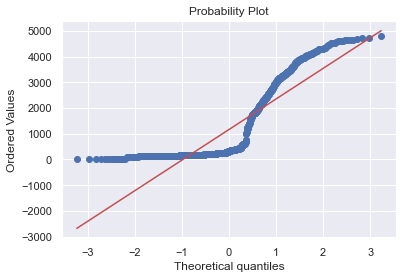

In [172]:
qq_plot(
    column_name='Price',
    dataframe_name=df
)

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Price Distribution after filling missing values with mode')

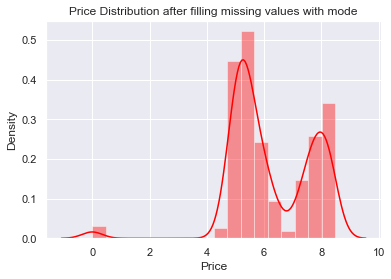

In [173]:

# Let's apply log to price
df['Price'] = df['Price'].apply(lambda value: np.log(value) if value > 0 else value)
sns.distplot(df['Price'], color ='red').set_title("Price Distribution after filling missing values with mode")

In [174]:
df.head()

,Price,Open,High,Low,Vol.,Change %,Day,Month,Year
0,8.029348,3182.32,3184.15,3045.92,401.88K,-3.54%,16.0,2.0,2022.0
1,8.065350,2929.29,3193.18,2912.61,540.04K,8.64%,15.0,2.0,2022.0
2,7.982522,2871.06,NaN,2834.13,477.24K,2.06%,14.0,2.0,2022.0
3,7.962154,2917.16,2952.94,2838.29,303.12K,-1.61%,13.0,2.0,2022.0
4,0.000000,2927.64,2984.72,2858.85,433.29K,-0.36%,12.0,2.0,2022.0


Let's plot qq-plot to detect to see whether our data set follow normal distribution.

## What is qq plot:-
Quantile-Quantile plot use to show how many percentage of data is below the specific point in the dataset and normally distributed graph.

Q-Q plots are used to find the type of distribution for a random variable whether it be a Gaussian Distribution, Uniform Distribution, Exponential Distribution or even Pareto Distribution, etc. You can tell the type of distribution using the power of the Q-Q plot just by looking at the plot.

x-axis = Indicate (normal-quantiles) means quantile of normally distributed graph from specific data point.

y-axis = Indicate quantile in dataset from specific data point.

Ex:-
How to calculate quntile for y axis,

1 3 5 6 9 11 12 13 19 21 22 32 35 36 45 44 55 68 79 80 81 88 90 91 92 100 112 113 114 120 121 132 145 146 149 150 155 180 189 190

Step 1): Order the data from smallest to largest. The data in the question is already in ascending order.

Step 2): Count how many observations you have in your data set. this particular data set has 40 items.

Step 3): Convert any percentage to a decimal for “q”. We are looking for the number where 20 percent of the values fall below it, so convert that to .2.

Step 4): Insert your values into the formula:
ith observation = q (n + 1)
ith observation = .2 (40 + 1) = 8.2

Answer): The ith observation is at 8.2, so we round down to 8 (remembering that this formula is an estimate). The 8th number in the set is 13, which is the number where 20 percent of the values fall below it.



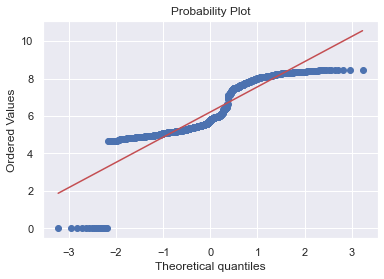

In [175]:
qq_plot(
    column_name='Price',
    dataframe_name=df
)

In [176]:
def outlier_box_plot(df_name,column_name):
    plt.figure(figsize = (4,8))
    sns.boxplot(y = df_name[column_name])

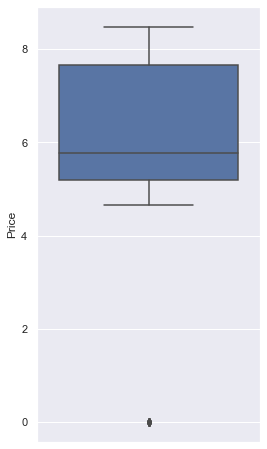

In [177]:
outlier_box_plot(
    column_name='Price',
    df_name=df
)

By above graph we can clearly see that, there are outliers are present inside dataset.

In [178]:
def outlier_detection_iqr(df , column):
    global lower,upper
    q25, q75 = np.quantile(df[column], 0.25), np.quantile(df[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [179]:
outlier_detection_iqr(df,'Price')

The IQR is 2.4698530350921652
The lower bound value is 1.4921415873437085
The upper bound value is 11.371553727712369
Total number of outliers are 16


In [180]:
def outlier_distribution_graph(df_name, col_name):
    plt.figure(figsize = (10,6))
    sns.distplot(df_name[col_name], kde=False)
    plt.axvspan(xmin = lower,xmax= df_name[col_name].min(),alpha=0.2, color='red')
    plt.axvspan(xmin = upper,xmax= df_name[col_name].max(),alpha=0.2, color='red')

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


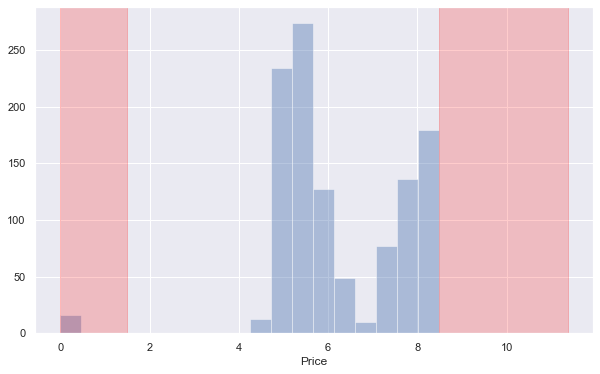

In [181]:
outlier_distribution_graph(
    col_name='Price',
    df_name=df
)

In [182]:
#Data Frame without outliers
def remove_rows_having_outlier(df_name,column_name,upper_limit,lower_limit):
    return df_name[(df_name[column_name] < upper_limit) & (df_name[column_name] > lower_limit)]

In [183]:
df = remove_rows_having_outlier(
    column_name='Price',
    df_name=df,
    lower_limit=lower,
    upper_limit=upper,
)

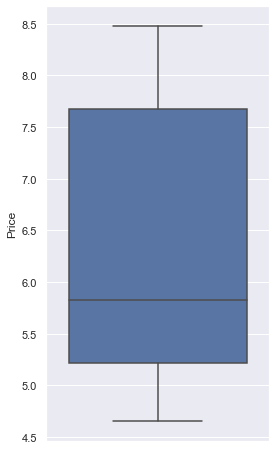

In [184]:
# Below box plot shows that there won't be any outlier exist more. 
outlier_box_plot(
    column_name='Price',
    df_name=df
)

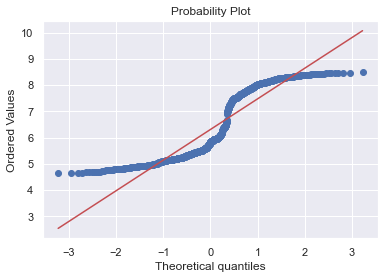

In [185]:
qq_plot(
    column_name='Price',
    dataframe_name=df
)

#### 2) Open

In [186]:
df.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'Day', 'Month',
       'Year'],
      dtype='object')

In [187]:
missing_rows(
    column_name="Open",
    dataframe_name=df
)

,Price,Open,High,Low,Vol.,Change %,Day,Month,Year
23,7.800167,NaN,2540.81,2161.55,1.56M,-3.93%,24.0,1.0,2022.0
73,8.341601,NaN,4247.38,4036.00,707.69K,1.73%,5.0,12.0,2021.0
129,8.135942,NaN,3599.18,3409.22,767.49K,-4.45%,10.0,10.0,2021.0
214,7.548545,NaN,1917.80,1851.97,623.52K,1.05%,17.0,7.0,2021.0
331,7.427959,NaN,1806.62,1659.28,1.58M,-5.68%,22.0,3.0,2021.0
380,7.225045,NaN,1376.44,1272.09,1.65M,4.62%,1.0,2.0,2021.0
460,6.166027,NaN,477.78,457.65,9.85M,2.97%,13.0,11.0,2020.0
540,5.948557,NaN,409.02,370.4,8.28M,-6.01%,25.0,8.0,2020.0
610,5.461116,NaN,235.95,228.99,7.03M,1.92%,16.0,6.0,2020.0
673,5.065439,NaN,161.57,155.52,21.20M,1.33%,14.0,4.0,2020.0


In [188]:
df["Open"] = df["Open"].astype(float).fillna(0.0)

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Open Distribution before filling missing values')

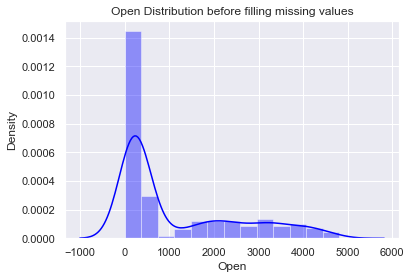

In [189]:
sns.distplot(df['Open'], color ='blue').set_title("Open Distribution before filling missing values")

In [190]:
df_open = df[["Open"]].copy()

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Open Distribution after filling missing values with mean')

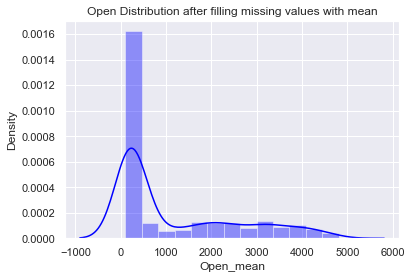

In [191]:
# Let's apply various methods for filling missing values.
# Mean
df_open["Open_mean"] = df_open["Open"].replace(0,df_open["Open"].mean())
sns.distplot(df_open['Open_mean'], color ='blue').set_title("Open Distribution after filling missing values with mean")

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Open Distribution after filling missing values with median')

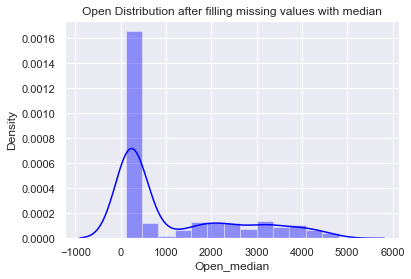

In [192]:
# Median
df_open["Open_median"] = df_open["Open"].replace(0,df_open["Open"].median())
sns.distplot(df_open['Open_median'], color ='blue').set_title("Open Distribution after filling missing values with median")

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Open Distribution after filling missing values with mode')

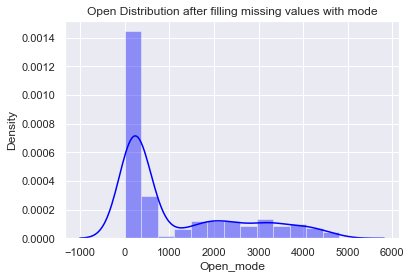

In [193]:
# Mode
df_open["Open_mode"] = df_open["Open"].replace(0,df_open["Open"].mode()[0])
sns.distplot(df_open['Open_mode'], color ='blue').set_title("Open Distribution after filling missing values with mode")

As we can clearly see from above graphs that,
Graph with missing values and after applying mode method in order to fill missing values seems to
be same.

In [194]:
df["Open"] = df_open["Open_mode"]

In [195]:

# Let's apply log to Open
df['Open'] = df['Open'].apply(lambda value: np.log(value )if value > 0 else value)

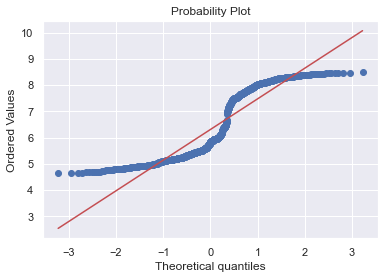

In [196]:
qq_plot(
    column_name='Open',
    dataframe_name=df
)

Let's remove outlier from this column

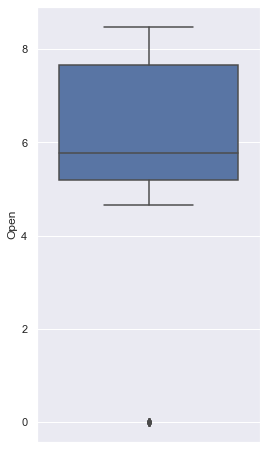

In [197]:
outlier_box_plot(
    column_name='Open',
    df_name=df
)

In [198]:
outlier_detection_iqr(
    df=df,
    column='Open'
)

The IQR is 2.4693200895512444
The lower bound value is 1.4934389034947495
The upper bound value is 11.370719261699726
Total number of outliers are 14


In [199]:
df = remove_rows_having_outlier(
    column_name='Open',
    df_name=df,
    lower_limit=lower,
    upper_limit=upper,
)

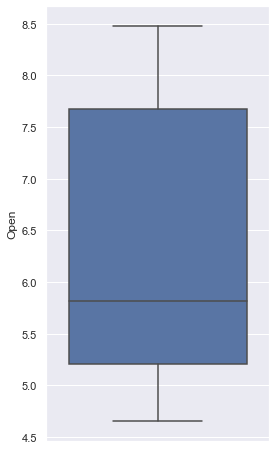

In [200]:
outlier_box_plot(
    column_name='Open',
    df_name=df
)

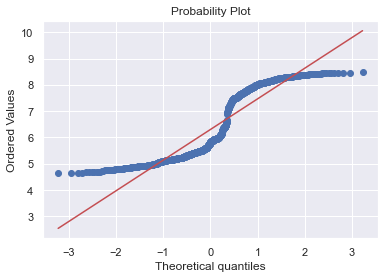

In [201]:
qq_plot(
    column_name='Open',
    dataframe_name=df
)

#### 3,4) High, Low

In [202]:
df.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'Day', 'Month',
       'Year'],
      dtype='object')

In [203]:
# All rows of dataset having missing values in High column.
missing_rows(
    column_name="High",
    dataframe_name=df
)

,Price,Open,High,Low,Vol.,Change %,Day,Month,Year
2,7.982522,7.962437,NaN,2834.13,477.24K,2.06%,14.0,2.0,2022.0
83,8.416334,8.359540,NaN,4248.90,578.65K,5.77%,25.0,11.0,2021.0
204,7.740760,7.709864,NaN,2152.92,1.25M,3.17%,27.0,7.0,2021.0
260,7.876134,7.903943,NaN,2529.73,2.45M,-2.76%,1.0,6.0,2021.0
680,5.104186,5.142073,NaN,162.75,35.79M,-3.71%,7.0,4.0,2020.0
762,5.102059,5.114635,NaN,159.08,16.24M,-1.26%,16.0,1.0,2020.0
923,5.394355,5.414677,NaN,215.57,7.54M,-2.00%,8.0,8.0,2019.0
1056,4.928340,4.938996,NaN,137.68,9.52M,-1.08%,28.0,3.0,2019.0
1126,4.804267,4.801641,NaN,117.51,3.61M,0.25%,17.0,1.0,2019.0


In [204]:
# All rows of dataset having missing values in Low column.
missing_rows(
    column_name="Low",
    dataframe_name=df
)

,Price,Open,High,Low,Vol.,Change %,Day,Month,Year
194,7.968815,7.947053,2946.62,NaN,1.06M,2.20%,6.0,8.0,2021.0
499,5.867261,5.865589,354.86,NaN,4.96M,NaN,5.0,10.0,2020.0
690,4.875426,4.880830,132.68,NaN,21.03M,-0.54%,28.0,3.0,2020.0


In [205]:
df["High"] = df["High"].astype(float).fillna(0.0)
df["Low"] = df["Low"].astype(float).fillna(0.0)

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'High, Low Distribution before filling missing values')

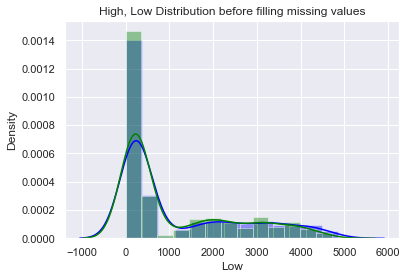

In [206]:
sns.distplot(df['High'], color ='blue')
sns.distplot(df['Low'], color ='green').set_title("High, Low Distribution before filling missing values")

Let's apply mean method here

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'High, Low Distribution after filling missing values with mean')

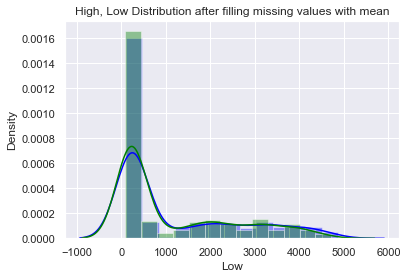

In [207]:
# Mean
df["High"] = df["High"].replace(0,df["High"].mean())
sns.distplot(df['High'], color ='blue')

# Mean
df["Low"] = df["Low"].replace(0,df["Low"].mean())
sns.distplot(df['Low'], color ='green').set_title("High, Low Distribution after filling missing values with mean")

In [208]:

# Let's apply log to High and Low columns
df['High'] = df['High'].apply(lambda value: np.log(value )if value > 0 else value)
df['Low'] = df['Low'].apply(lambda value: np.log(value )if value > 0 else value)

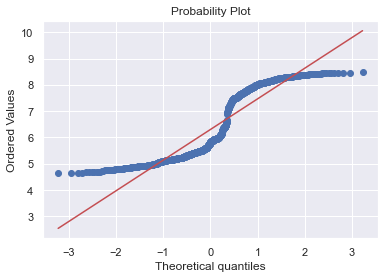

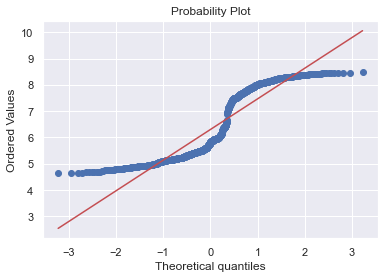

In [209]:
qq_plot(
    column_name='High',
    dataframe_name=df
)

qq_plot(
    column_name='Low',
    dataframe_name=df
)

In [210]:
# Round all values to two decimal points.
# df = df.round(2)

Let's analyze, is there any outlier present inside High, and Low columns.

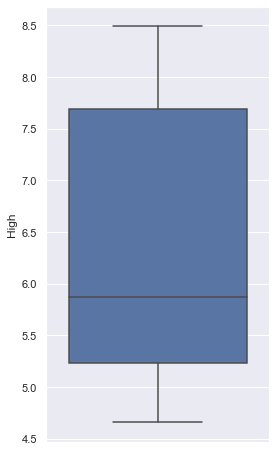

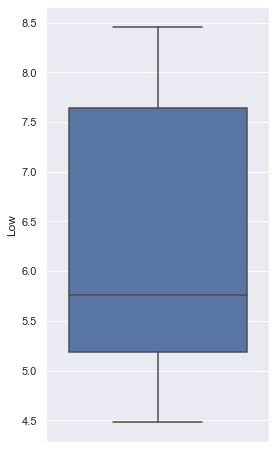

In [211]:
outlier_box_plot(
    column_name='High',
    df_name=df
)
outlier_box_plot(
    column_name='Low',
    df_name=df
)

# As shown in below graph, no outlier present inside bothe of these columns.

#### 5) Vol

In [212]:
df.columns

Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %', 'Day', 'Month',
       'Year'],
      dtype='object')

In [213]:
missing_rows(
    column_name="Vol.",
    dataframe_name=df,
)

,Price,Open,High,Low,Vol.,Change %,Day,Month,Year
8,8.044267,8.051867,8.079884,8.016219,NaN,-0.77%,8.0,2.0,2022.0
124,8.260208,8.240211,8.269990,8.225559,NaN,2.02%,15.0,10.0,2021.0
309,7.740634,7.667416,7.747368,7.666920,NaN,7.58%,13.0,4.0,2021.0
512,5.840729,5.832820,5.846988,5.817557,NaN,0.80%,22.0,9.0,2020.0
677,5.061709,5.133855,5.136386,5.027296,NaN,-6.97%,10.0,4.0,2020.0


In [214]:
def calculate_volume(value):
    value = str(value)
    if('K' in value):
        value = value.replace('K','')
        return float(value)/1000
    else:
        value = value.replace('M','')
        return float(value)

In [215]:
df['Volume(In Million)'] = df['Vol.'].apply(lambda value : calculate_volume(value))

In [216]:
# Let drop Vol. column as we have created new one.
drop_columns_from_dataframe(
    dataframe_name=df,
    list_of_columns_name=['Vol.']
)

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Changes in price Distribution before filling missing values')

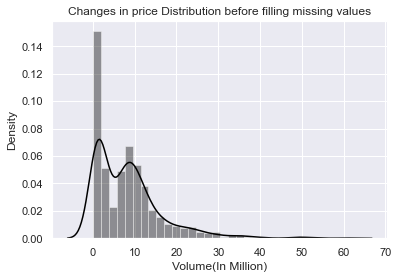

In [217]:
sns.distplot(df['Volume(In Million)'], color ='black').set_title("Changes in price Distribution before filling missing values")

In [218]:
df['Volume(In Million)'] = df['Volume(In Million)'].astype(float).fillna(0.0)

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Volume(In Million) Distribution after filling missing values with mean')

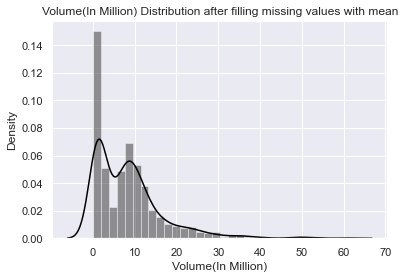

In [219]:
# Mean
df['Volume(In Million)'] = df['Volume(In Million)'].replace(0,df['Volume(In Million)'].mean())
sns.distplot(df['Volume(In Million)'], color ='black').set_title("Volume(In Million) Distribution after filling missing values with mean")

In [220]:
# Let's apply log transformation here.
df['Volume(In Million)'] = df['Volume(In Million)'].apply(lambda value: np.log(value )if value > 0 else value)

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Volume(In Million) Distribution after filling missing values with mean')

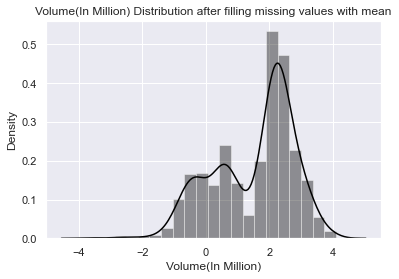

In [221]:
sns.distplot(df['Volume(In Million)'], color ='black').set_title("Volume(In Million) Distribution after filling missing values with mean")

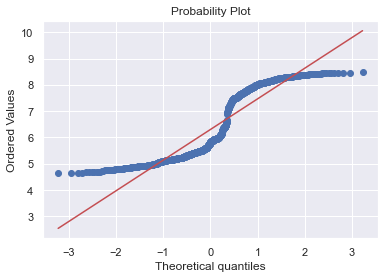

In [222]:
qq_plot(
    column_name='Volume(In Million)',
    dataframe_name=df
)

Let's analyze, is there any outlier present inside Volume(In Million) column.

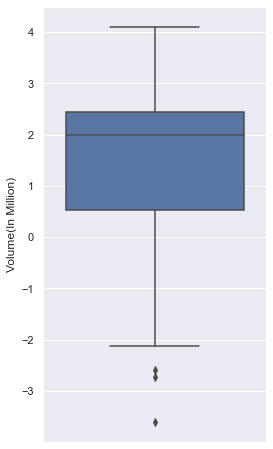

In [223]:
outlier_box_plot(
    column_name='Volume(In Million)',
    df_name=df
)

In [224]:
# standard deviation method to remove outlier from the dataset.
def outlier_detection_std(df, column):
    global lower,upper
    # calculate the mean and standard deviation of the data frame
    data_mean, data_std = df[column].mean(), df[column].std()
    # calculate the cutoff value
    cut_off = data_std * 3
    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] > upper]
    df2 = df[df[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])


In [225]:
outlier_detection_std(
    df=df,
    column='Volume(In Million)',
)

The lower bound value is -2.264804971498612
The upper bound value is 5.311019823188825
Total number of outliers are 3


In [226]:
df = remove_rows_having_outlier(
    column_name='Volume(In Million)',
    df_name=df,
    lower_limit=lower,
    upper_limit=upper
)

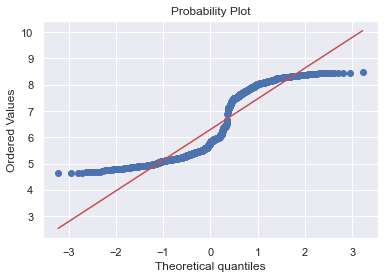

In [227]:
qq_plot(
    column_name='Volume(In Million)',
    dataframe_name=df
)

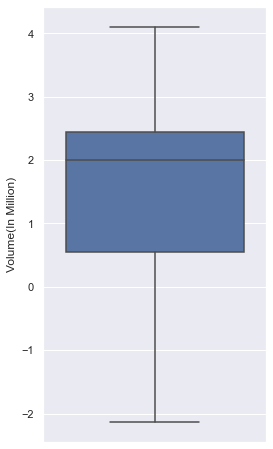

In [228]:
outlier_box_plot(
    column_name='Volume(In Million)',
    df_name=df
)

#### 6) Change %

In [229]:
missing_rows(
    column_name="Change %",
    dataframe_name=df,
)

,Price,Open,High,Low,Change %,Day,Month,Year,Volume(In Million)
14,7.893945,7.932778,7.940787,7.870193,NaN,2.0,2.0,2022.0,-0.506834
137,8.128281,8.104444,8.151319,8.091312,NaN,2.0,10.0,2021.0,-0.250836
213,7.545612,7.548561,7.595005,7.539878,NaN,18.0,7.0,2021.0,-0.186607
261,7.904139,7.777763,7.906171,7.731676,NaN,31.0,5.0,2021.0,1.040277
405,7.110165,7.097309,7.159922,7.050201,NaN,7.0,1.0,2021.0,0.996949
499,5.867261,5.865589,5.871723,7.026913,NaN,5.0,10.0,2020.0,1.601406
683,4.969883,4.949681,4.981618,4.937061,NaN,4.0,4.0,2020.0,2.983153
717,5.384449,5.382245,5.426886,5.361292,NaN,1.0,3.0,2020.0,2.843164


In [230]:
df['Change %'] = df['Change %'].str.replace('%','')

In [231]:
df['Change %'] = df['Change %'].astype(float).fillna(0.0)

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Changes in price Distribution before filling missing values')

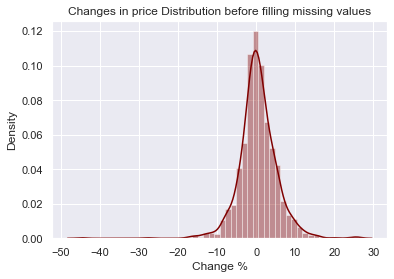

In [232]:
sns.distplot(df['Change %'], color ='maroon').set_title("Changes in price Distribution before filling missing values")

As we can clearly see from the above graph that, fluctuation of prices follow gaussian distribution so that we can fill missing
values with mean.

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Changes in price Distribution after filling missing values with mean')

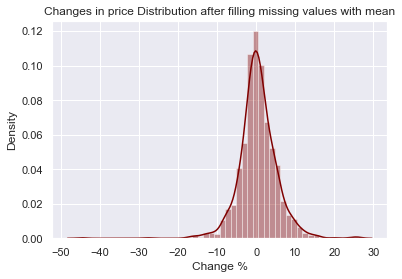

In [233]:
# Mean
df['Change %'] = df['Change %'].replace(0,df['Change %'].mean())
sns.distplot(df['Change %'], color ='maroon').set_title("Changes in price Distribution after filling missing values with mean")

Let's analyze, is there any outlier present inside Change % column.

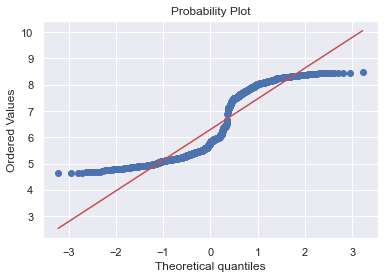

In [234]:
qq_plot(
    column_name='Change %',
    dataframe_name=df
)

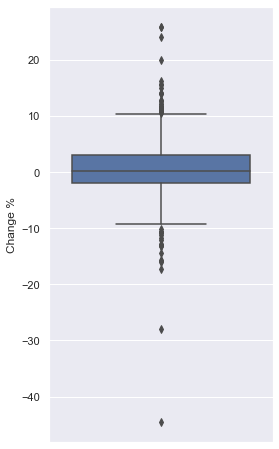

In [235]:
outlier_box_plot(
    column_name='Change %',
    df_name=df
)

In [236]:
outlier_detection_std(
    column='Change %',
    df=df
)

The lower bound value is -14.336191181589383
The upper bound value is 15.26092647359672
Total number of outliers are 14


C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


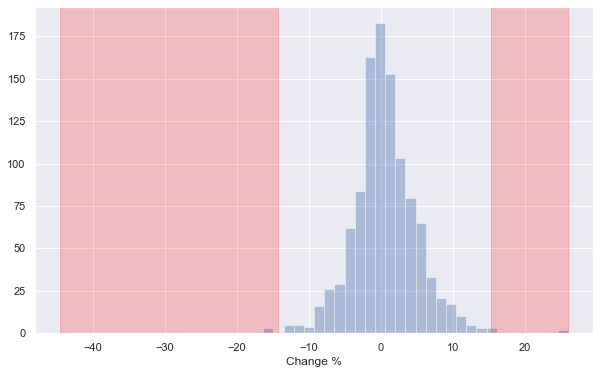

In [237]:
outlier_distribution_graph(
    col_name='Change %',
    df_name=df
)

In [238]:
df = remove_rows_having_outlier(
    column_name='Change %',
    df_name=df,
    lower_limit=lower,
    upper_limit=upper
)

In [239]:
missing_rows(
    column_name="Day",
    dataframe_name=df
)

,Price,Open,High,Low,Change %,Day,Month,Year,Volume(In Million)


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1068 entries, 0 to 1127
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Price               1068 non-null   float64
 1   Open                1068 non-null   float64
 2   High                1068 non-null   float64
 3   Low                 1068 non-null   float64
 4   Change %            1068 non-null   float64
 5   Day                 1068 non-null   float64
 6   Month               1068 non-null   float64
 7   Year                1068 non-null   float64
 8   Volume(In Million)  1068 non-null   float64
dtypes: float64(9)
memory usage: 83.4 KB


Now data is clean, does not have missing values and outliers

In [241]:
df.shape

(1068, 9)

In [242]:
df.head(50)

,Price,Open,High,Low,Change %,Day,Month,Year,Volume(In Million)
0,8.029348,8.065366,8.065941,8.021558,-3.540000,16.0,2.0,2022.0,-0.911602
1,8.065350,7.982515,8.068773,7.976805,8.640000,15.0,2.0,2022.0,-0.616112
2,7.982522,7.962437,7.093713,7.949490,2.060000,14.0,2.0,2022.0,-0.739736
3,7.962154,7.978366,7.990557,7.950957,-1.610000,13.0,2.0,2022.0,-1.193627
5,7.981949,8.030019,8.050809,7.965754,-4.690000,11.0,2.0,2022.0,-0.497696
6,8.030029,8.084479,8.094793,8.025709,-5.300000,10.0,2.0,2022.0,-0.297679
7,8.084445,8.044277,8.091447,8.024846,4.100000,9.0,2.0,2022.0,-0.738521
8,8.044267,8.051867,8.079884,8.016219,-0.770000,8.0,2.0,2022.0,2.115166
9,8.052035,8.024957,8.066449,8.004896,2.750000,7.0,2.0,2022.0,-0.564895
10,8.024928,8.010940,8.030484,7.991985,1.410000,6.0,2.0,2022.0,-1.150179


In [243]:
# Let's save our newly cleaned dataframe into new csv file, so that we can do 
# feature engineering.
df.to_csv('D:\\Assignement 1\\Feature Engineering\\cleaned_dataset.csv',index=False)